In [1]:
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

In [2]:
os.chdir("C:/Users/Abhie/Desktop/Data Science (BI)/Pandas Python/Logistic Regression")

In [3]:
warnings.filterwarnings("ignore")
%matplotlib inline

# Test and Train allocation

In [4]:
hr_test= pd.read_csv("test_HR Analytics.csv")
hr_train= pd.read_csv("train_HR Analytics.csv")

In [5]:
hra= hr_test.append(hr_train)

In [6]:
hra.shape

(78298, 14)

In [7]:
hra.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 78298 entries, 0 to 54807
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   employee_id           78298 non-null  int64  
 1   department            78298 non-null  object 
 2   region                78298 non-null  object 
 3   education             74855 non-null  object 
 4   gender                78298 non-null  object 
 5   recruitment_channel   78298 non-null  object 
 6   no_of_trainings       78298 non-null  int64  
 7   age                   78298 non-null  int64  
 8   previous_year_rating  72362 non-null  float64
 9   length_of_service     78298 non-null  int64  
 10  KPIs_met >80%         78298 non-null  int64  
 11  awards_won?           78298 non-null  int64  
 12  avg_training_score    78298 non-null  int64  
 13  is_promoted           54808 non-null  float64
dtypes: float64(2), int64(7), object(5)
memory usage: 9.0+ MB


In [8]:
hra.describe(include="all")

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
count,78298.000000,78298,78298,74855,78298,78298,78298.000000,78298.000000,72362.000000,78298.000000,78298.000000,78298.000000,78298.000000,54808.000000
unique,NaN,9,34,3,2,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,Sales & Marketing,region_2,Bachelor's,m,other,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,24155,17642,52247,55092,43524,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,39149.500000,NaN,NaN,NaN,NaN,NaN,1.253378,34.797619,3.332219,5.848974,0.354032,0.023053,63.349664,0.085170
std,22602.830026,NaN,NaN,NaN,NaN,NaN,0.606766,7.665928,1.260982,4.248070,0.478222,0.150073,13.383664,0.279137
min,1.000000,NaN,NaN,NaN,NaN,NaN,1.000000,20.000000,1.000000,1.000000,0.000000,0.000000,39.000000,0.000000
25%,19575.250000,NaN,NaN,NaN,NaN,NaN,1.000000,29.000000,3.000000,3.000000,0.000000,0.000000,51.000000,0.000000
50%,39149.500000,NaN,NaN,NaN,NaN,NaN,1.000000,33.000000,3.000000,5.000000,0.000000,0.000000,60.000000,0.000000
75%,58723.750000,NaN,NaN,NaN,NaN,NaN,1.000000,39.000000,4.000000,7.000000,1.000000,0.000000,76.000000,0.000000


In [9]:
hra.describe()

,employee_id,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
count,78298.000000,78298.000000,78298.000000,72362.000000,78298.000000,78298.000000,78298.000000,78298.000000,54808.000000
mean,39149.500000,1.253378,34.797619,3.332219,5.848974,0.354032,0.023053,63.349664,0.085170
std,22602.830026,0.606766,7.665928,1.260982,4.248070,0.478222,0.150073,13.383664,0.279137
min,1.000000,1.000000,20.000000,1.000000,1.000000,0.000000,0.000000,39.000000,0.000000
25%,19575.250000,1.000000,29.000000,3.000000,3.000000,0.000000,0.000000,51.000000,0.000000
50%,39149.500000,1.000000,33.000000,3.000000,5.000000,0.000000,0.000000,60.000000,0.000000
75%,58723.750000,1.000000,39.000000,4.000000,7.000000,1.000000,0.000000,76.000000,0.000000
max,78298.000000,10.000000,60.000000,5.000000,37.000000,1.000000,1.000000,99.000000,1.000000


In [10]:
(hra.isnull().sum()/hra.shape[0])*100

employee_id              0.000000
department               0.000000
region                   0.000000
education                4.397303
gender                   0.000000
recruitment_channel      0.000000
no_of_trainings          0.000000
age                      0.000000
previous_year_rating     7.581292
length_of_service        0.000000
KPIs_met >80%            0.000000
awards_won?              0.000000
avg_training_score       0.000000
is_promoted             30.000766
dtype: float64

In [11]:
hra.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,8724,Technology,region_26,Bachelor's,m,sourcing,1,24,NaN,1,1,0,77,NaN
1,74430,HR,region_4,Bachelor's,f,other,1,31,3.0,5,0,0,51,NaN
2,72255,Sales & Marketing,region_13,Bachelor's,m,other,1,31,1.0,4,0,0,47,NaN
3,38562,Procurement,region_2,Bachelor's,f,other,3,31,2.0,9,0,0,65,NaN
4,64486,Finance,region_29,Bachelor's,m,sourcing,1,30,4.0,7,0,0,61,NaN


In [12]:
hra["previous_year_rating"].unique()

array([nan,  3.,  1.,  2.,  4.,  5.])

In [13]:
hra.apply(lambda x: len(x.unique()))

employee_id             78298
department                  9
region                     34
education                   4
gender                      2
recruitment_channel         3
no_of_trainings            10
age                        41
previous_year_rating        6
length_of_service          35
KPIs_met >80%               2
awards_won?                 2
avg_training_score         61
is_promoted                 3
dtype: int64

# Unvariate Analysis

In [14]:
hra["department"].value_counts(normalize = True)*100

Sales & Marketing    30.850086
Operations           20.577793
Procurement          12.973511
Technology           12.962017
Analytics             9.797185
Finance               4.632302
HR                    4.473933
Legal                 1.895323
R&D                   1.837850
Name: department, dtype: float64

In [15]:
hra.education.value_counts(normalize=True)*100

Bachelor's          69.797609
Master's & above    28.627346
Below Secondary      1.575045
Name: education, dtype: float64

In [16]:
hra.education.isnull().sum()

3443

# Missing Value Treatment

In [17]:
hra["education"]=hra["education"].fillna(hra["education"].mode()[0])
hra["education"].isnull().sum()

0

In [18]:
hra.education.value_counts(normalize=True)*100

Bachelor's          71.125699
Master's & above    27.368515
Below Secondary      1.505786
Name: education, dtype: float64

# Univariate Analysis Continued*

In [19]:
hra.gender.value_counts(normalize=True)*100

m    70.36195
f    29.63805
Name: gender, dtype: float64

In [20]:
hra.recruitment_channel.value_counts(normalize=True)*100

other       55.587627
sourcing    42.377839
referred     2.034535
Name: recruitment_channel, dtype: float64

In [21]:
hra.no_of_trainings.value_counts(normalize=True)*100

1     80.852640
2     14.727068
3      3.232522
4      0.840379
5      0.209456
6      0.086848
7      0.026821
8      0.008940
9      0.008940
10     0.006386
Name: no_of_trainings, dtype: float64

<AxesSubplot:xlabel='no_of_trainings', ylabel='count'>

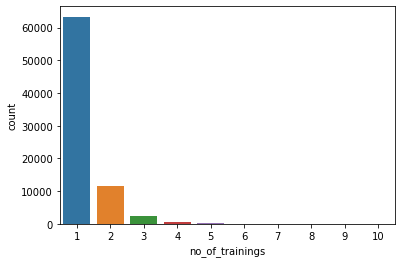

In [22]:
sns.countplot(hra["no_of_trainings"])

In [23]:
hra.no_of_trainings.describe()

count    78298.000000
mean         1.253378
std          0.606766
min          1.000000
25%          1.000000
50%          1.000000
75%          1.000000
max         10.000000
Name: no_of_trainings, dtype: float64

# Univariate analysis Continued*

In [24]:
hra["KPIs_met >80%"].value_counts(normalize=True)*100

0    64.596797
1    35.403203
Name: KPIs_met >80%, dtype: float64

<AxesSubplot:xlabel='age', ylabel='Density'>

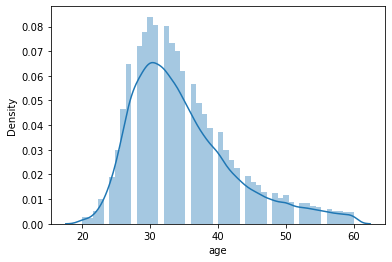

In [25]:
sns.distplot(hra["age"])

In [26]:
hra["age"].describe()

count    78298.000000
mean        34.797619
std          7.665928
min         20.000000
25%         29.000000
50%         33.000000
75%         39.000000
max         60.000000
Name: age, dtype: float64

In [27]:
#Age Bins
hra["Age_Bin"]=np.where(hra.age<=30,"1_20-30 Yrs",
                             np.where(hra.age>40,"3_Above 40 Yrs","2_30-40 Yrs"))

In [28]:
hra["Age_Bin"].value_counts()

2_30-40 Yrs       37121
1_20-30 Yrs       25946
3_Above 40 Yrs    15231
Name: Age_Bin, dtype: int64

In [29]:
print("1_20-30 Yrs=",hra[hra["Age_Bin"]=="1_20-30 Yrs"]["is_promoted"].sum())
print("2_30-40 Yrs=",hra[hra["Age_Bin"]=="2_30-40 Yrs"]["is_promoted"].sum())
print("3_Above 40 Yrs=",hra[hra["Age_Bin"]=="3_Above 40 Yrs"]["is_promoted"].sum())

1_20-30 Yrs= 1550.0
2_30-40 Yrs= 2359.0
3_Above 40 Yrs= 759.0


In [30]:
abin=pd.DataFrame(hra.Age_Bin.value_counts())

In [31]:
prom=hra.groupby("Age_Bin").sum()["is_promoted"]
prm_ratio=pd.concat([abin,prom],axis=1)
# hra.groupby("Age_Bin").sum()["is_promoted"]

In [32]:
prm_ratio

,Age_Bin,is_promoted
2_30-40 Yrs,37121,2359.0
1_20-30 Yrs,25946,1550.0
3_Above 40 Yrs,15231,759.0


In [33]:
prm_ratio["ratio"]=(prm_ratio.is_promoted/prm_ratio.Age_Bin)*100

In [34]:
prm_ratio

,Age_Bin,is_promoted,ratio
2_30-40 Yrs,37121,2359.0,6.354893
1_20-30 Yrs,25946,1550.0,5.973946
3_Above 40 Yrs,15231,759.0,4.983258


In [35]:
hra.shape

(78298, 15)

In [36]:
hra["previous_year_rating"].value_counts(normalize=True)*100

3.0    36.675327
5.0    23.269119
4.0    19.521296
1.0    12.303419
2.0     8.230839
Name: previous_year_rating, dtype: float64

In [37]:
hra.previous_year_rating.isnull().sum()

5936

# Missing Value Treatment

In [38]:
pd.crosstab(hra["previous_year_rating"], hra["KPIs_met >80%"]).sort_values([0])

KPIs_met >80%,0,1
previous_year_rating,,
2.0,4859,1097
5.0,6073,10765
1.0,7746,1157
4.0,8415,5711
3.0,19637,6902


In [39]:
hra.corr()

,employee_id,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
employee_id,1.000000,-0.005216,0.000586,0.001372,0.004420,0.000127,0.005943,-0.003930,0.001206
no_of_trainings,-0.005216,1.000000,-0.082536,-0.058439,-0.058403,-0.043912,-0.004818,0.044180,-0.024896
age,0.000586,-0.082536,1.000000,0.009137,0.653339,-0.026223,-0.007357,-0.044592,-0.017166
previous_year_rating,0.001372,-0.058439,0.009137,1.000000,0.001063,0.350921,0.027636,0.071813,0.159320
length_of_service,0.004420,-0.058403,0.653339,0.001063,1.000000,-0.077854,-0.040556,-0.035272,-0.010670
KPIs_met >80%,0.000127,-0.043912,-0.026223,0.350921,-0.077854,1.000000,0.100365,0.076729,0.221582
awards_won?,0.005943,-0.004818,-0.007357,0.027636,-0.040556,0.100365,1.000000,0.072655,0.195871
avg_training_score,-0.003930,0.044180,-0.044592,0.071813,-0.035272,0.076729,0.072655,1.000000,0.181147
is_promoted,0.001206,-0.024896,-0.017166,0.159320,-0.010670,0.221582,0.195871,0.181147,1.000000


In [40]:
hra["previous_year_rating"]=np.round(hra["previous_year_rating"].fillna(hra["previous_year_rating"].groupby(hra["KPIs_met >80%"]).transform("mean")))

<AxesSubplot:xlabel='previous_year_rating', ylabel='Density'>

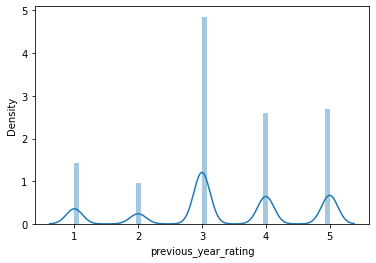

In [41]:
sns.distplot(hra.previous_year_rating)

In [42]:
hra.previous_year_rating.isnull().sum()

0

# Univariate Analysis Continued*

<AxesSubplot:xlabel='length_of_service'>

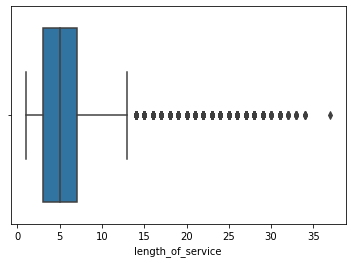

In [43]:
sns.boxplot(hra["length_of_service"])

<AxesSubplot:xlabel='length_of_service', ylabel='Density'>

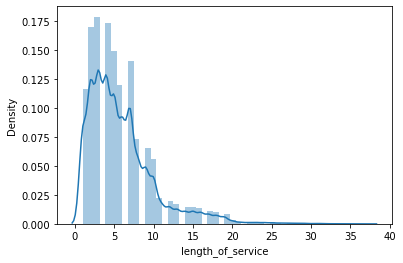

In [44]:
sns.distplot(hra["length_of_service"])

# Outlier Treatment

In [45]:
#Percentile Rule
P=np.percentile(hra["length_of_service"],99.5)
P

24.0

In [46]:
p=(hra[hra["length_of_service"]>P]["length_of_service"].count()/hra.shape[0])*100
p

0.4304069069452604

In [47]:
hra["length_of_service_99"]=np.where(hra["length_of_service"]>P,P,hra["length_of_service"])
hra["length_of_service_99"]

0         1.0
1         5.0
2         4.0
3         9.0
4         7.0
         ... 
54803    17.0
54804     6.0
54805     3.0
54806     2.0
54807     5.0
Name: length_of_service_99, Length: 78298, dtype: float64

<AxesSubplot:xlabel='length_of_service_99', ylabel='Density'>

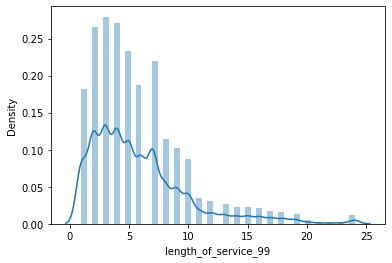

In [48]:
sns.distplot(hra["length_of_service_99"])

In [49]:
#Taking Log values to shrink the Data
hra["length_of_service_log"]=np.log(hra["length_of_service"])

<AxesSubplot:xlabel='length_of_service_log', ylabel='Density'>

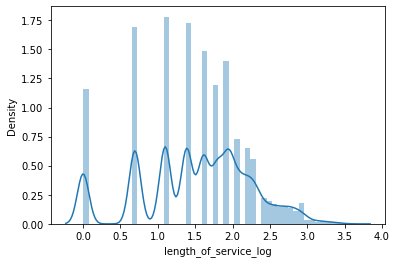

In [50]:
sns.distplot(hra["length_of_service_log"])

In [51]:
hra.length_of_service.describe()

count    78298.000000
mean         5.848974
std          4.248070
min          1.000000
25%          3.000000
50%          5.000000
75%          7.000000
max         37.000000
Name: length_of_service, dtype: float64

In [52]:
#Bucketing The service column as 75% of data is between 1-7 yrs
hra["Length_Bucket"]=np.where(hra.length_of_service<=5,"1_0-5 Yrs",
                             np.where(hra.length_of_service>7,"3_Above 7 Yrs","2_5-7 Yrs"))

In [53]:
print("1_0-5 yrs=",hra[hra["Length_Bucket"]=="1_0-5 Yrs"]["is_promoted"].sum())
print("2_5-7 yrs=",hra[hra["Length_Bucket"]=="2_5-7 Yrs"]["is_promoted"].sum())
print("3_Above_7 yrs=",hra[hra["Length_Bucket"]=="3_Above 7 Yrs"]["is_promoted"].sum())

1_0-5 yrs= 2654.0
2_5-7 yrs= 865.0
3_Above_7 yrs= 1149.0


In [54]:
#Dataframing
pd.DataFrame(hra.Length_Bucket.value_counts())

,Length_Bucket
1_0-5 Yrs,44330
3_Above 7 Yrs,19301
2_5-7 Yrs,14667


In [55]:
hra["Length_Bucket"].isnull().sum()

0

# Univariate Analysis Continued*

<AxesSubplot:xlabel='avg_training_score'>

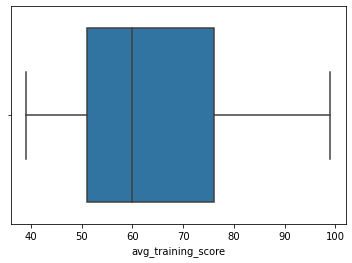

In [56]:
sns.boxplot(hra["avg_training_score"])

<AxesSubplot:xlabel='avg_training_score', ylabel='Density'>

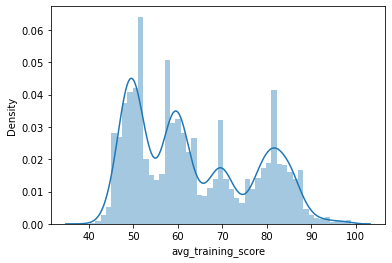

In [57]:
sns.distplot(hra["avg_training_score"])

<AxesSubplot:xlabel='awards_won?', ylabel='count'>

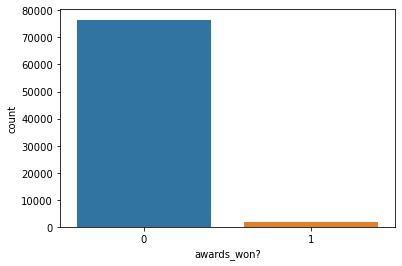

In [58]:
sns.countplot(hra["awards_won?"])

In [59]:
hra["awards_won?"].value_counts(normalize=True)*100

0    97.694705
1     2.305295
Name: awards_won?, dtype: float64

<AxesSubplot:>

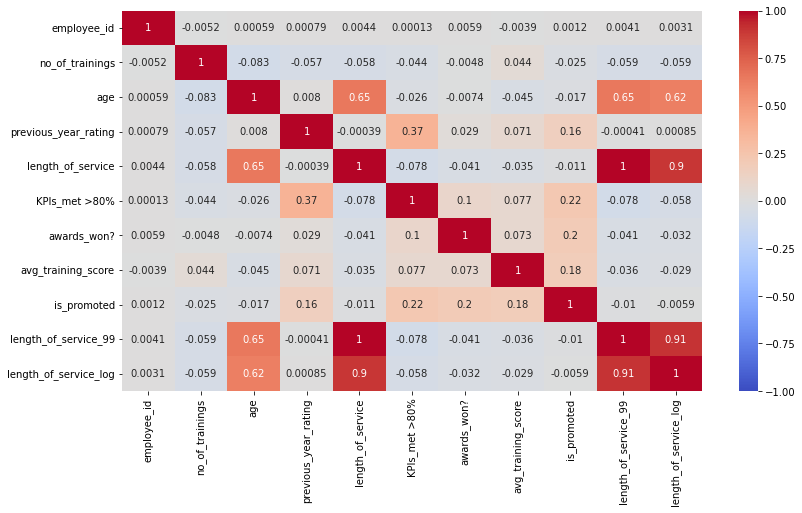

In [60]:
plt.figure(figsize=(13,7))
sns.heatmap(hra.corr(), annot=True, vmin=-1, vmax=1, center=0, cmap="coolwarm")

# Bivariate Analysis

In [61]:
Ed_plot=hra.pivot_table(index="education", values="is_promoted", aggfunc=np.sum)
Ed_plot

,is_promoted
education,
Bachelor's,3130.0
Below Secondary,67.0
Master's & above,1471.0


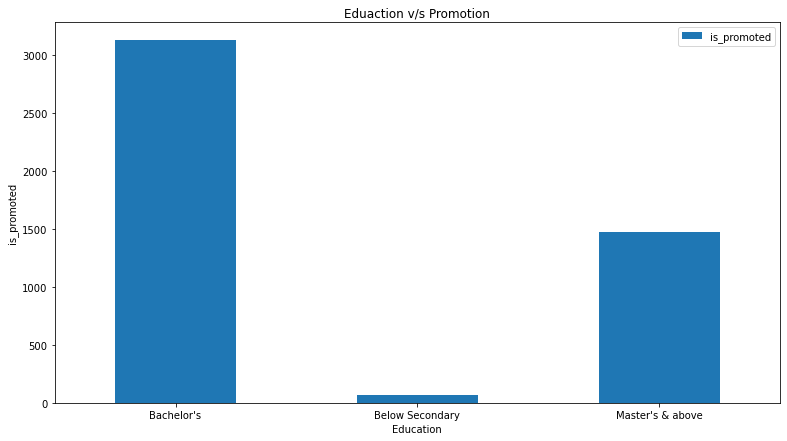

In [62]:
Ed_plot.plot(kind="bar", figsize=(13,7))
plt.xlabel("Education")
plt.ylabel("is_promoted")
plt.title("Eduaction v/s Promotion")
plt.xticks(rotation=0)
plt.show()

In [63]:
pd.crosstab(hra["gender"], hra["is_promoted"])

is_promoted,0.0,1.0
gender,,
f,14845,1467
m,35295,3201


In [64]:
pd.crosstab(hra["no_of_trainings"], hra["is_promoted"])

is_promoted,0.0,1.0
no_of_trainings,,
1,40468,3910
2,7382,605
3,1654,122
4,442,26
5,125,3
6,42,2
7,12,0
8,5,0
9,5,0


In [65]:
pd.crosstab(hra["Age_Bin"], hra["is_promoted"])

is_promoted,0.0,1.0
Age_Bin,,
1_20-30 Yrs,16568,1550
2_30-40 Yrs,23669,2359
3_Above 40 Yrs,9903,759


In [66]:
pd.crosstab(hra["previous_year_rating"], hra["is_promoted"])

is_promoted,0.0,1.0
previous_year_rating,,
1.0,6135,88
2.0,4044,181
3.0,19844,1456
4.0,10297,1022
5.0,9820,1921


In [67]:
pd.crosstab(hra["Length_Bucket"], hra["is_promoted"])

is_promoted,0.0,1.0
Length_Bucket,,
1_0-5 Yrs,28278,2654
2_5-7 Yrs,9420,865
3_Above 7 Yrs,12442,1149


In [68]:
pd.crosstab(hra["avg_training_score"], hra["is_promoted"])

is_promoted,0.0,1.0
avg_training_score,,
39,2,0
40,5,0
41,25,1
42,60,2
43,169,7
...,...,...
95,0,45
96,1,47
97,0,49


In [69]:
pd.crosstab(hra["awards_won?"], hra["is_promoted"])

is_promoted,0.0,1.0
awards_won?,,
0,49429,4109
1,711,559


In [70]:
hra.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 78298 entries, 0 to 54807
Data columns (total 18 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   employee_id            78298 non-null  int64  
 1   department             78298 non-null  object 
 2   region                 78298 non-null  object 
 3   education              78298 non-null  object 
 4   gender                 78298 non-null  object 
 5   recruitment_channel    78298 non-null  object 
 6   no_of_trainings        78298 non-null  int64  
 7   age                    78298 non-null  int64  
 8   previous_year_rating   78298 non-null  float64
 9   length_of_service      78298 non-null  int64  
 10  KPIs_met >80%          78298 non-null  int64  
 11  awards_won?            78298 non-null  int64  
 12  avg_training_score     78298 non-null  int64  
 13  is_promoted            54808 non-null  float64
 14  Age_Bin                78298 non-null  object 
 15  le

# Model Building

In [71]:
hra1= hra.copy()

In [72]:
hra1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 78298 entries, 0 to 54807
Data columns (total 18 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   employee_id            78298 non-null  int64  
 1   department             78298 non-null  object 
 2   region                 78298 non-null  object 
 3   education              78298 non-null  object 
 4   gender                 78298 non-null  object 
 5   recruitment_channel    78298 non-null  object 
 6   no_of_trainings        78298 non-null  int64  
 7   age                    78298 non-null  int64  
 8   previous_year_rating   78298 non-null  float64
 9   length_of_service      78298 non-null  int64  
 10  KPIs_met >80%          78298 non-null  int64  
 11  awards_won?            78298 non-null  int64  
 12  avg_training_score     78298 non-null  int64  
 13  is_promoted            54808 non-null  float64
 14  Age_Bin                78298 non-null  object 
 15  le

In [73]:
hra1.drop(["length_of_service_log", "length_of_service_99","length_of_service", "employee_id", "recruitment_channel", "region", "age"], axis = 1, inplace = True)

# Define Dummy Variables

In [74]:
hra1= pd.get_dummies(hra1, drop_first=True)

In [75]:
hra1

,no_of_trainings,previous_year_rating,KPIs_met >80%,awards_won?,avg_training_score,is_promoted,department_Finance,department_HR,department_Legal,department_Operations,...,department_R&D,department_Sales & Marketing,department_Technology,education_Below Secondary,education_Master's & above,gender_m,Age_Bin_2_30-40 Yrs,Age_Bin_3_Above 40 Yrs,Length_Bucket_2_5-7 Yrs,Length_Bucket_3_Above 7 Yrs
0,1,4.0,1,0,77,NaN,0,0,0,0,...,0,0,1,0,0,1,0,0,0,0
1,1,3.0,0,0,51,NaN,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0
2,1,1.0,0,0,47,NaN,0,0,0,0,...,0,1,0,0,0,1,1,0,0,0
3,3,2.0,0,0,65,NaN,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1
4,1,4.0,0,0,61,NaN,1,0,0,0,...,0,0,0,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54803,1,3.0,0,0,78,0.0,0,0,0,0,...,0,0,1,0,0,1,0,1,0,1
54804,1,2.0,0,0,56,0.0,0,0,0,1,...,0,0,0,0,1,0,1,0,1,0
54805,1,5.0,1,0,79,0.0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
54806,1,1.0,0,0,45,0.0,0,0,0,0,...,0,1,0,0,0,1,0,0,0,0


In [76]:
test1=hra1[hra1["is_promoted"].isnull()]
train1=hra1[hra["is_promoted"].notnull()]

In [77]:
print(train1.shape)
print(test1.shape)

(54808, 21)
(23490, 21)


# Assigning X and Y

In [78]:
train_y=train1["is_promoted"]
train_x= train1.drop("is_promoted", axis=1)
test_c1=test1.drop("is_promoted", axis=1)

In [79]:
train_x

,no_of_trainings,previous_year_rating,KPIs_met >80%,awards_won?,avg_training_score,department_Finance,department_HR,department_Legal,department_Operations,department_Procurement,department_R&D,department_Sales & Marketing,department_Technology,education_Below Secondary,education_Master's & above,gender_m,Age_Bin_2_30-40 Yrs,Age_Bin_3_Above 40 Yrs,Length_Bucket_2_5-7 Yrs,Length_Bucket_3_Above 7 Yrs
0,1,5.0,1,0,49,0,0,0,0,0,0,1,0,0,1,0,1,0,0,1
1,1,5.0,0,0,60,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0
2,1,3.0,0,0,50,0,0,0,0,0,0,1,0,0,0,1,1,0,1,0
3,2,1.0,0,0,50,0,0,0,0,0,0,1,0,0,0,1,1,0,0,1
4,1,3.0,0,0,73,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54803,1,3.0,0,0,78,0,0,0,0,0,0,0,1,0,0,1,0,1,0,1
54804,1,2.0,0,0,56,0,0,0,1,0,0,0,0,0,1,0,1,0,1,0
54805,1,5.0,1,0,79,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
54806,1,1.0,0,0,45,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0


In [80]:
train_y

0        0.0
1        0.0
2        0.0
3        0.0
4        0.0
        ... 
54803    0.0
54804    0.0
54805    0.0
54806    0.0
54807    0.0
Name: is_promoted, Length: 54808, dtype: float64

In [81]:
test_c1.isnull().sum()

no_of_trainings                 0
previous_year_rating            0
KPIs_met >80%                   0
awards_won?                     0
avg_training_score              0
department_Finance              0
department_HR                   0
department_Legal                0
department_Operations           0
department_Procurement          0
department_R&D                  0
department_Sales & Marketing    0
department_Technology           0
education_Below Secondary       0
education_Master's & above      0
gender_m                        0
Age_Bin_2_30-40 Yrs             0
Age_Bin_3_Above 40 Yrs          0
Length_Bucket_2_5-7 Yrs         0
Length_Bucket_3_Above 7 Yrs     0
dtype: int64

## --------------------------------------------------------------------------------------------------------------------------

# ***Logistic Regression Model

In [82]:
from sklearn.linear_model import LogisticRegression
LR= LogisticRegression()
model = LR.fit(train_x, train_y )

In [83]:
model

LogisticRegression()

# Model Evaluation

In [84]:
pred1 = model.predict(test_c1)

In [85]:
pred1

array([0., 0., 0., ..., 0., 0., 0.])

In [86]:
D_final = hr_test["employee_id"]

In [87]:
predicted = pd.concat([D_final,pd.DataFrame(pred1, columns=["is_promoted"])],axis=1)

# Predicted promotion

In [88]:
predicted.head()

,employee_id,is_promoted
0,8724,0.0
1,74430,0.0
2,72255,0.0
3,38562,0.0
4,64486,0.0


In [89]:
predicted["is_promoted"].value_counts()

0.0    23182
1.0      308
Name: is_promoted, dtype: int64

In [90]:
predicted["is_promoted"]=predicted["is_promoted"].apply(lambda x:int(x))

In [91]:
predicted.head()

,employee_id,is_promoted
0,8724,0
1,74430,0
2,72255,0
3,38562,0
4,64486,0


# Exporting Final Prediction

In [92]:
#predicted.to_csv("Predicted Promotion_OG Logi1.csv", index=False)

# ***Decision Tree Model

### Training Decision tree algorithm using Classifier

In [93]:
from sklearn.tree import DecisionTreeClassifier
dtc=DecisionTreeClassifier()
dtc.fit(train_x,train_y)

DecisionTreeClassifier()

In [94]:
y_pred_dt=dtc.predict(test_c1)

In [95]:
y_pred_dt

array([0., 0., 0., ..., 0., 0., 1.])

In [96]:
DT_pred=pd.concat([D_final,pd.DataFrame(y_pred_dt,columns=["is_promoted"])], axis=1)

In [97]:
DT_pred

,employee_id,is_promoted
0,8724,0.0
1,74430,0.0
2,72255,0.0
3,38562,0.0
4,64486,0.0
...,...,...
23485,53478,0.0
23486,25600,0.0
23487,45409,0.0
23488,1186,0.0


In [98]:
DT_pred["is_promoted"].value_counts()

0.0    22144
1.0     1346
Name: is_promoted, dtype: int64

In [99]:
DT_pred["is_promoted"]=DT_pred["is_promoted"].apply(lambda x:int(x))

# Exporting the predicted file

In [100]:
#DT_pred.to_csv("Predicted Promotion_OG by Decision Tree.csv", index=False)

## ----------------------------------------------------------------------------------------------------------------------

# ***Random Forest Model

### Training Algorithm

In [101]:
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier(n_estimators=95, random_state=0)
rfc.fit(train_x, train_y)

RandomForestClassifier(n_estimators=95, random_state=0)

In [102]:
y_pred_rfc=rfc.predict(test_c1)

In [103]:
y_pred_rfc

array([0., 0., 0., ..., 0., 0., 1.])

In [104]:
rfc_pred=pd.concat([D_final,pd.DataFrame(y_pred_rfc, columns=["is_promoted"])], axis=1)

In [105]:
rfc_pred["is_promoted"].value_counts()

0.0    22323
1.0     1167
Name: is_promoted, dtype: int64

In [106]:
rfc_pred["is_promoted"]=rfc_pred["is_promoted"].apply(lambda x:int(x))

# Exporting file

In [107]:
#rfc_pred.to_csv("Predicted Promotion_OG by Random Forest95.csv", index=False)

## --------------------------------------------------------------------------------------------------------------------

# Validating number of estimators

In [108]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score

In [109]:
tr_x, tst_x, tr_y, tst_y = train_test_split(train_x,train_y, train_size=0.8)

In [110]:
est=[]
f1=[]
for i in range(1,101):
    rfc=RandomForestClassifier(n_estimators=i, random_state=0)
    rfc.fit(tr_x,tr_y)
    
    pr=rfc.predict(tst_x)
    f1s= f1_score(tst_y, pr)
    est.append(i)
    f1.append(f1s)

In [111]:
dt={"Estimator":est, "F1 Score":f1}

In [112]:
dt1=pd.DataFrame(dt)

In [113]:
dt1

,Estimator,F1 Score
0,1,0.428986
1,2,0.402367
2,3,0.456588
3,4,0.439871
4,5,0.461633
...,...,...
95,96,0.486867
96,97,0.485275
97,98,0.483418
98,99,0.485623


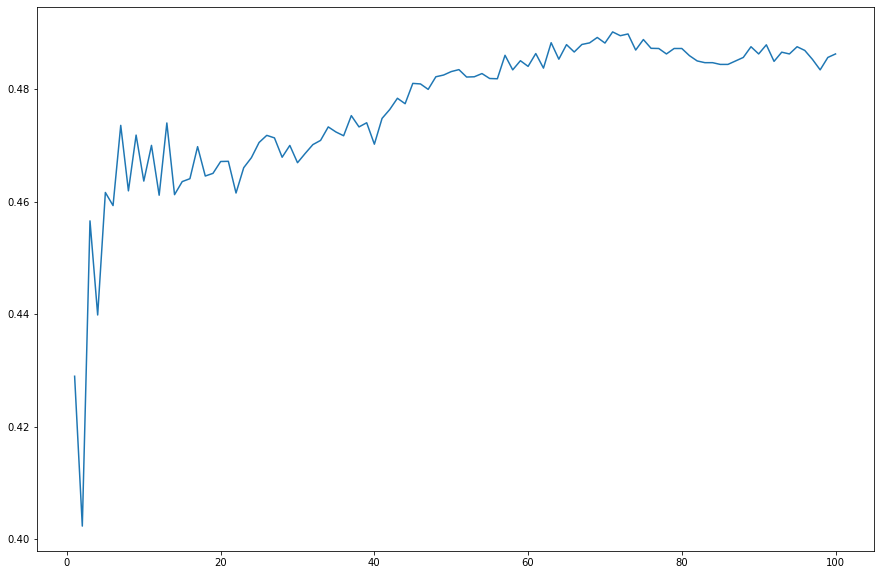

In [114]:
plt.figure(figsize=(15,10))
plt.plot(dt1["Estimator"],dt1["F1 Score"])

## ----------------------------------------------------------------------------------------------------------------

# ***Naive Bayes Classifier Algorithm

In [115]:
from sklearn.naive_bayes import GaussianNB
GNB= GaussianNB()
model = GNB.fit(train_x, train_y )

In [116]:
y_pred_gnb=GNB.predict(test_c1)

In [117]:
y_pred_gnb

array([0., 0., 0., ..., 0., 0., 0.])

In [118]:
gnb_pred=pd.concat([D_final,pd.DataFrame(y_pred_gnb, columns=["is_promoted"])], axis=1)

In [119]:
gnb_pred["is_promoted"].value_counts()

0.0    22513
1.0      977
Name: is_promoted, dtype: int64

In [120]:
#gnb_pred["is_promoted"]=gnb_pred["is_promoted"].apply(lambda x:int(x))

# Exporting file

In [121]:
#gnb_pred.to_csv("Predicted Promotion_OG by Naive Bayes.csv", index=False)

## --------------------------------------------------------------------------------------------------------------------

In [122]:
from statistics import mode

# ***Voting Classifier (Ensemble Method) Algorithm

In [123]:
# Traditional Approach
final_pred_voting=np.array([])
for i in range(0,len(test_c1)):
    final_pred_voting= np.append(final_pred_voting, mode([pred1[i],y_pred_dt[i],y_pred_rfc[i],y_pred_gnb[i]]))

In [124]:
final_pred_voting

array([0., 0., 0., ..., 0., 0., 0.])

In [125]:
#Voting Algorithm Approach
from sklearn.ensemble import VotingClassifier
model1=LogisticRegression(random_state=0)
model2=DecisionTreeClassifier(random_state=0)
model3=RandomForestClassifier(random_state=0,n_estimators=95)
model= VotingClassifier(estimators=[("lr",model1),("dt",model2),("rfc",model3)], voting="hard")
model.fit(train_x,train_y)

VotingClassifier(estimators=[('lr', LogisticRegression(random_state=0)),
                             ('dt', DecisionTreeClassifier(random_state=0)),
                             ('rfc',
                              RandomForestClassifier(n_estimators=95,
                                                     random_state=0))])

In [126]:
test_c1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23490 entries, 0 to 23489
Data columns (total 20 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   no_of_trainings               23490 non-null  int64  
 1   previous_year_rating          23490 non-null  float64
 2   KPIs_met >80%                 23490 non-null  int64  
 3   awards_won?                   23490 non-null  int64  
 4   avg_training_score            23490 non-null  int64  
 5   department_Finance            23490 non-null  uint8  
 6   department_HR                 23490 non-null  uint8  
 7   department_Legal              23490 non-null  uint8  
 8   department_Operations         23490 non-null  uint8  
 9   department_Procurement        23490 non-null  uint8  
 10  department_R&D                23490 non-null  uint8  
 11  department_Sales & Marketing  23490 non-null  uint8  
 12  department_Technology         23490 non-null  uint8  
 13  e

In [127]:
pred_ensemble=model.predict(test_c1)

In [128]:
pred_ensemble

array([0., 0., 0., ..., 0., 0., 1.])

In [129]:
pd.DataFrame(pred_ensemble).value_counts()

0.0    22436
1.0     1054
dtype: int64

In [130]:
hr_test.columns

Index(['employee_id', 'department', 'region', 'education', 'gender',
       'recruitment_channel', 'no_of_trainings', 'age', 'previous_year_rating',
       'length_of_service', 'KPIs_met >80%', 'awards_won?',
       'avg_training_score'],
      dtype='object')

In [131]:
Prediction_Ensemble=pd.concat([hr_test.employee_id,pd.DataFrame(pred_ensemble)],axis=1)

In [132]:
Prediction_Ensemble.head()

,employee_id,0
0,8724,0.0
1,74430,0.0
2,72255,0.0
3,38562,0.0
4,64486,0.0


In [133]:
Prediction_Ensemble.columns=["employee_id","is_promoted"]

In [134]:
Prediction_Ensemble.is_promoted=Prediction_Ensemble.is_promoted.apply(int)

In [135]:
#Prediction_Ensemble.to_csv("Prediction_Ensemble.csv",index=False)

## -----------------------------------------------------------------------------------------------------------------------

# ****Adaboost (Boosting Algorithm)

In [136]:
from sklearn.ensemble import AdaBoostClassifier
abc=AdaBoostClassifier(random_state=1)
abc.fit(train_x,train_y)

AdaBoostClassifier(random_state=1)

In [137]:
abc_pred=abc.predict(test_c1)

In [138]:
abc_pred

array([0., 0., 0., ..., 0., 0., 0.])

In [139]:
Prediction_abc=pd.concat([hr_test.employee_id,pd.DataFrame(abc_pred, columns= ["is_promoted"])],axis=1)

In [140]:
Prediction_abc.head()

,employee_id,is_promoted
0,8724,0.0
1,74430,0.0
2,72255,0.0
3,38562,0.0
4,64486,0.0


In [141]:
Prediction_abc.is_promoted=Prediction_abc.is_promoted.apply(int)

In [142]:
Prediction_abc["is_promoted"].value_counts()

0    23006
1      484
Name: is_promoted, dtype: int64

In [143]:
#Prediction_abc.to_csv("Prediction_AdaBooster.csv",index=False)

## ----------------------------------------------------------------------------------------------------------------------

# **Gradient Boosting Classifier

In [144]:
from sklearn.ensemble import GradientBoostingClassifier
gbc=GradientBoostingClassifier(learning_rate=0.01, random_state=1)
gbc.fit(train_x,train_y)

GradientBoostingClassifier(learning_rate=0.01, random_state=1)

In [145]:
gbc_pred=gbc.predict(test_c1)

In [146]:
gbc_pred

array([0., 0., 0., ..., 0., 0., 0.])

In [147]:
Prediction_gbc=pd.concat([hr_test.employee_id,pd.DataFrame(gbc_pred, columns= ["is_promoted"])],axis=1)

In [148]:
Prediction_gbc.is_promoted=Prediction_gbc.is_promoted.apply(int)

In [149]:
Prediction_gbc["is_promoted"].value_counts()

0    23287
1      203
Name: is_promoted, dtype: int64

In [150]:
#Prediction_gbc.to_csv("Prediction_GradientBooster.csv",index=False)

## ----------------------------------------------------------------------------------------------------------------------

# ***XGBOOST Algorithm

In [151]:
import xgboost as xgb

In [152]:
xb=xgb.XGBClassifier(random_state=1,learning_rate=0.01)
xb.fit(train_x,train_y)

[19:47:47] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.01, max_delta_step=0,
              max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=4,
              num_parallel_tree=1, predictor='auto', random_state=1,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [153]:
xb_pred=xb.predict(test_c1)

In [154]:
xb_pred

array([0., 0., 0., ..., 0., 0., 0.])

In [155]:
Prediction_xb=pd.concat([hr_test.employee_id,pd.DataFrame(xb_pred, columns= ["is_promoted"])],axis=1)

In [156]:
Prediction_xb.is_promoted=Prediction_xb.is_promoted.apply(int)

In [157]:
Prediction_xb["is_promoted"].value_counts()

0    23056
1      434
Name: is_promoted, dtype: int64

In [158]:
Prediction_xb.to_csv("Prediction_XGB.csv",index=False)

## ----------------------------------------------------------------------------------------------------------------------

# **XGB + Grid Search CV

In [159]:
#import xgboost as xgb

In [161]:
parameters={"learning_rate":[0.01,0.1,0.2,0.3],
           "n_estimators":[10,20,30,40,50,75,100,150,200],
           "n_jobs":[2,6,8,10],
           "max_depth":[4,6,8,10]
           }

In [163]:
model=xgb.XGBClassifier(random_state=0)

In [ ]:
from sklearn.model_selection import GridSearchCV
gscv_xgb=GridSearchCV(estimator=model,
                     param_grid=parameters,
                     cv=10,
                     n_jobs=-1)

gscv_xgb.fit(train_x,train_y)

In [ ]:
gscv_pred=gscy_xgb.predict(test_c1)

In [ ]:
gscv_pred